# 1. importation des librairies et preparation des données

## 1.1 importation des librairies

In [1877]:

import pandas as pd
import matplotlib.pyplot as plt

In [1878]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

## 1.2 importation des dataframes

In [1879]:
erp = pd.read_csv('../DA-P5/sources/erp.csv', sep=";")
web = pd.read_csv('../DA-P5/sources/web.csv', sep=";")
link = pd.read_csv('../DA-P5/sources/liaison.csv', sep=";")

## 1.3 preparation des dataframes

In [1880]:
# verification de l'unicité des identifiants
print(f'le fichier erp possède {len(erp)} lignes')
print(f"la colonne product_id posséde {len(erp['product_id'].unique())} valeurs uniques")
print(f'Chaque product_id est donc bien unique et peux servir de clef primaire')


le fichier erp possède 825 lignes
la colonne product_id posséde 825 valeurs uniques
Chaque product_id est donc bien unique et peux servir de clef primaire


In [1881]:
# verification de la table de liaison
print(f'le fichier link possède {len(link)} lignes')
print(f"la colonne product_id posséde {len(link['product_id'].unique())} valeurs uniques")
print(f'Le fichier de liaison posséde autant de lignes que le fichier erp, \n'
      f'une liaison devrait donc etre possible, en se basant sur la colonne product_id')

le fichier link possède 825 lignes
la colonne product_id posséde 825 valeurs uniques
Le fichier de liaison posséde autant de lignes que le fichier erp, 
une liaison devrait donc etre possible, en se basant sur la colonne product_id


In [1882]:
# fusion du fichier erp et de la table de liaison, puis preparation pour la fusion avec fichier web
# uncite product ID
# tout detailler

temp = pd.merge(erp, link, on='product_id', how='left')
print(f'le nouveau fichier, resultat de la fusion entre le fichier erp et le fichier de liaison possède {len(temp)} lignes,\n'
      f"soit autant que les fichiers erp et link, la fusion semble donc s'être passée correctement")
print(f"la colonne id_web posséde {len(temp['id_web'].unique())} valeurs uniques, et {len(temp[temp['id_web'].isna()])} valeurs manquantes")
temp = temp.dropna(subset=["id_web"], axis=0)

le nouveau fichier, resultat de la fusion entre le fichier erp et le fichier de liaison possède 825 lignes,
soit autant que les fichiers erp et link, la fusion semble donc s'être passée correctement
la colonne id_web posséde 735 valeurs uniques, et 91 valeurs manquantes


In [1883]:
# preparation du fichier web
web.rename(columns={'sku':'id_web'}, inplace=True)
print(f'le fichier web possède {len(web)} lignes')
print(f"la colonne id_web possède {len(web['id_web'].unique())} valeurs uniques")
web = web.sort_values(by=['id_web'], axis=0)
display(web[:10])
print(f'Chaque produit apparait 2 fois dans le fichier, une ligne pour le produit, \n'
'et une ligne pour le meme produit, avec le lien vers la photo')
web.drop(web.loc[web['post_type']=='attachment'].index, inplace=True)
print('On enleve toutes les lignes inutiles')
print(f'Il reste {len(web)} lignes apres supressions des doublons')
print(f"La colonne id_web du fichier web possède {len(web[web['id_web'].isna()])} valeurs manquantes")
web = web.dropna(subset=["id_web"], axis=0)
print(f'Il reste {len(web)} lignes apres supressions des valeurs manquantes')

le fichier web possède 1513 lignes
la colonne id_web possède 715 valeurs uniques


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,NaN,publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1046,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,NaN,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1106,10775,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,NaN,Albert Mann Pinot Gris Vendanges Tardives Alte...,NaN,publish,closed,closed,NaN,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
321,10775,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,NaN,Albert Mann Pinot Gris Vendanges Tardives Alte...,Belle bouteille dotée d’une grande complexité ...,publish,closed,closed,NaN,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1072,10814,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,NaN,Thierry Germain Saumur-Champigny Outre Terre 2013,NaN,publish,closed,closed,NaN,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
281,10814,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,NaN,Thierry Germain Saumur-Champigny Outre Terre 2013,"La robe est rouge vif. Le nez est très floral,...",publish,closed,closed,NaN,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
257,11049,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,NaN,Alphonse Mellot Sancerre Rouge En Grands Champ...,Superbe robe carmin profond. Un très grand ter...,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1048,11049,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,NaN,Alphonse Mellot Sancerre Rouge En Grands Champ...,NaN,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Chaque produit apparait 2 fois dans le fichier, une ligne pour le produit, 
et une ligne pour le meme produit, avec le lien vers la photo
On enleve toutes les lignes inutiles
Il reste 799 lignes apres supressions des doublons
La colonne id_web du fichier web possède 85 valeurs manquantes
Il reste 714 lignes apres supressions des valeurs manquantes


In [1884]:
# fusion du fichier temporaire et du fichier web
linked = pd.merge(temp, web, on='id_web', how='inner')
print(f"Après fusion entre le fichier temporaire (734 lignes) et le fichier web (714 lignes),\n"
      "il nous reste bien {len(linked)} lignes\n"
      "La fusion a donc été effectuée avec les données renseignées")

Après fusion entre le fichier temporaire (734 lignes) et le fichier web (714 lignes),
il nous reste bien {len(linked)} lignes
La fusion a donc été effectuée avec les données renseignées


# 2. chiffre d'affaires

## 2.1 chiffre d'affaires par produit

In [1885]:
# ajout d'une colonne chiffre d'affaires par produit

linked['price'] = linked['price'].astype(float)
linked["chiffre d'affaires"] = linked['total_sales'] * linked['price']
print(f"En multipliant le prix de chaque produit par son nombre de ventes, on obtient le chiffres d'affaires par produit")
display(linked[['price', 'total_sales', "chiffre d'affaires"]][:10])

En multipliant le prix de chaque produit par son nombre de ventes, on obtient le chiffres d'affaires par produit


,price,total_sales,chiffre d'affaires
0,24.2,6.0,145.2
1,34.3,0.0,0.0
2,20.8,0.0,0.0
3,14.1,3.0,42.3
4,46.0,0.0,0.0
5,34.3,0.0,0.0
6,32.7,0.0,0.0
7,31.2,7.0,218.4
8,60.0,3.0,180.0
9,42.6,14.0,596.4


## 2.2 chiffres d'affaires total

In [1886]:
# chiffres d'affaires des produit en ligne
total = linked["chiffre d'affaires"].sum()
print(f"En addionant toutes les valeurs de chiffre d'affaires par produit, on obtient le chiffre d'affaires total, soit {total} euros")

En addionant toutes les valeurs de chiffre d'affaires par produit, on obtient le chiffre d'affaires total, soit 70568.6 euros


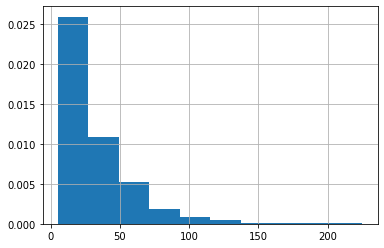

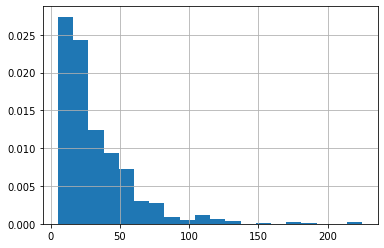

In [1887]:
# Histogramme      #boxplot
linked["price"].hist(density=True)
plt.show()

# Histogramme plus beau
linked["price"].hist(density=True,bins=20)
plt.show()
